## Initial Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools import *
import pandas as pd
import numpy as np
import datetime as dt
from cosc428_track_location.tools import consistent_scale_plot

## Inspecting a workout

In [3]:
# https://www.strava.com/activities/5094620458/overview 
points, laps = read_activity("data/activities/5431221291.fit")
# points, laps = read_activity("data/activities/run-20180206T165932.fit")

In [4]:
points

,Timestamp,lat,long,speed,cadence,x,y
0,2021-04-05 23:18:05+00:00,-43.524414,172.572008,2.118,171.0,627037.534882,5.179747e+06
1,2021-04-05 23:18:13+00:00,-43.524216,172.572205,3.256,172.0,627053.917153,5.179769e+06
2,2021-04-05 23:18:19+00:00,-43.524073,172.572363,3.312,174.0,627066.978349,5.179784e+06
3,2021-04-05 23:18:21+00:00,-43.524054,172.572424,3.303,174.0,627071.903041,5.179786e+06
4,2021-04-05 23:18:27+00:00,-43.524051,172.572681,3.406,174.0,627092.689446,5.179786e+06
...,...,...,...,...,...,...,...
222,2021-04-05 23:48:13+00:00,-43.52329,172.568371,3.331,170.0,626746.018943,5.179877e+06
223,2021-04-05 23:48:19+00:00,-43.523275,172.568104,3.359,170.0,626724.469483,5.179879e+06
224,2021-04-05 23:48:25+00:00,-43.523293,172.567845,3.406,170.0,626703.446800,5.179878e+06
225,2021-04-05 23:48:31+00:00,-43.523318,172.5676,3.424,169.0,626683.594460,5.179875e+06


In [4]:
laps

,Timestamp,start_pos_lat,start_pos_long,end_pos_lat,end_pos_long,total_timer_time,total_distance,avg_speed,lap_time,lap_distance,start_x,start_y,end_x,end_y
0,2021-04-05 23:34:44+00:00,-43.524427,172.571987,-43.521856,172.576163,NaN,NaN,1.741,1237.247,2153.65,627035.848233,5.179746e+06,627378.724575,5.180025e+06
1,2021-04-05 23:35:14+00:00,-43.521841,172.576156,-43.522591,172.575273,NaN,NaN,6.655,29.740,197.93,627378.221710,5.180026e+06,627305.280111,5.179944e+06
2,2021-04-05 23:37:01+00:00,-43.522652,172.575278,-43.521829,172.576152,NaN,NaN,1.561,106.812,166.72,627305.556792,5.179938e+06,627377.894157,5.180028e+06
3,2021-04-05 23:37:30+00:00,-43.521808,172.576149,-43.522568,172.57533,NaN,NaN,6.658,29.235,194.65,627377.654100,5.180030e+06,627309.934143,5.179947e+06
4,2021-04-05 23:39:09+00:00,-43.522626,172.57534,-43.521829,172.576161,NaN,NaN,1.607,99.272,159.57,627310.556566,5.179940e+06,627378.645893,5.180028e+06
5,2021-04-05 23:39:39+00:00,-43.521811,172.576163,-43.522604,172.575284,NaN,NaN,6.652,29.936,199.14,627378.805044,5.180030e+06,627306.113247,5.179943e+06
6,2021-04-05 23:41:20+00:00,-43.522604,172.575284,-43.521846,172.57615,NaN,NaN,1.485,100.999,150.03,627306.113247,5.179943e+06,627377.709851,5.180026e+06
7,2021-04-05 23:41:49+00:00,-43.521821,172.576144,-43.522543,172.575281,NaN,NaN,6.953,28.494,198.12,627377.252779,5.180029e+06,627305.990427,5.179950e+06
8,2021-04-05 23:48:37+00:00,-43.522602,172.575291,-43.523304,172.567483,NaN,NaN,2.26,406.732,919.39,627306.679536,5.179943e+06,626674.193371,5.179877e+06


In [8]:
haversine(-43.524427, 172.571987, -43.522602, 172.575291)

0.3348798998725978

In [11]:
((12752103.039307 - 12752347.172427)**2 + (-4436705.995843+4436519.929304)**2)**0.5

306.95559486100126

In [10]:
laps

,Timestamp,start_pos_lat,start_pos_long,end_pos_lat,end_pos_long,total_timer_time,total_distance,avg_speed,lap_time,lap_distance,start_x,start_y,end_x,end_y
0,2021-04-05 23:34:44+00:00,-43.524427,172.571987,-43.521856,172.576163,NaN,NaN,1.741,1237.247,2153.65,12752103.039307,-4436705.995843,12752411.612274,-4436443.911763
1,2021-04-05 23:35:14+00:00,-43.521841,172.576156,-43.522591,172.575273,NaN,NaN,6.655,29.740,197.93,12752411.122967,-4436442.348179,12752345.871738,-4436518.810017
2,2021-04-05 23:37:01+00:00,-43.522652,172.575278,-43.521829,172.576152,NaN,NaN,1.561,106.812,166.72,12752346.243364,-4436525.098531,12752410.800891,-4436441.151994
3,2021-04-05 23:37:30+00:00,-43.521808,172.576149,-43.522568,172.57533,NaN,NaN,6.658,29.235,194.65,12752410.540754,-4436438.998861,12752350.083493,-4436516.494545
4,2021-04-05 23:39:09+00:00,-43.522626,172.57534,-43.521829,172.576161,NaN,NaN,1.607,99.272,159.57,12752350.764806,-4436522.441292,12752411.488398,-4436441.160538
5,2021-04-05 23:39:39+00:00,-43.521811,172.576163,-43.522604,172.575284,NaN,NaN,6.652,29.936,199.14,12752411.599886,-4436439.357717,12752346.658345,-4436520.12582
6,2021-04-05 23:41:20+00:00,-43.522604,172.575284,-43.521846,172.57615,NaN,NaN,1.485,100.999,150.03,12752346.658345,-4436520.12582,12752410.664629,-4436442.860829
7,2021-04-05 23:41:49+00:00,-43.521821,172.576144,-43.522543,172.575281,NaN,NaN,6.953,28.494,198.12,12752410.200097,-4436440.391562,12752346.429176,-4436513.931292
8,2021-04-05 23:48:37+00:00,-43.522602,172.575291,-43.523304,172.567483,NaN,NaN,2.26,406.732,919.39,12752347.172427,-4436519.929304,12751770.199201,-4436591.53805


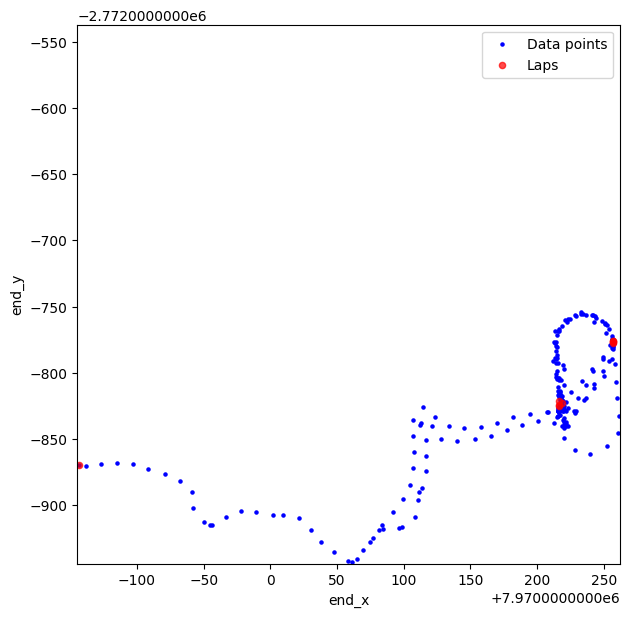

In [ ]:
plot_map(points, laps)

Data points are recorded dynamically based on the distance moved. For example, if the athlete is running fast, then points are recorded more frequently. In the above workout, the athlete is doing 200m reps and walking back to the start line again. The 200m reps where the athlete is running faster are a darker shade, indicating that the time between datapoints is less (1-2 seconds). In contrast, walking back to the startline (a slower pace) is a lighter shade, indicating that the time between datapoints is more. 

<AxesSubplot:title={'center':'Time between consecutive data points'}, ylabel='Frequency'>

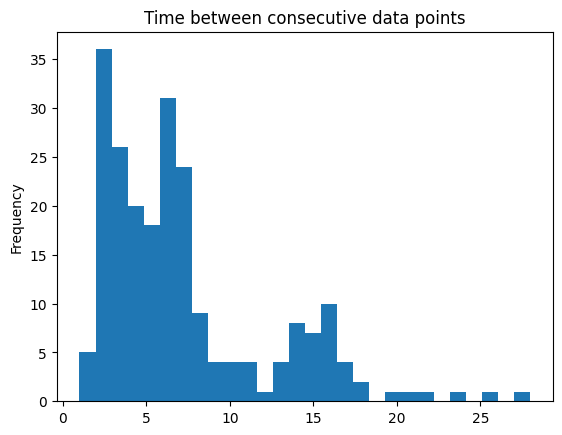

In [5]:
(
    points
    .assign(T_diff=lambda x: x.Timestamp.diff() / np.timedelta64(1, 's'))
    [lambda x: x.T_diff < 40]
    .T_diff.plot.hist(title="Time between consecutive data points",
                      xlabel="Time (s)",
                      bins=28)
)

This is likely causes the three peaks in the histogram above: the peak at 2-3 seconds is from completing the 200m reps; the peak at 5-6 seconds is from warming up/cooling down and general jogging; the peak at 15 seconds is from walking around. 

<AxesSubplot:title={'center':'Distance (km) between consecutive data points'}, ylabel='Frequency'>

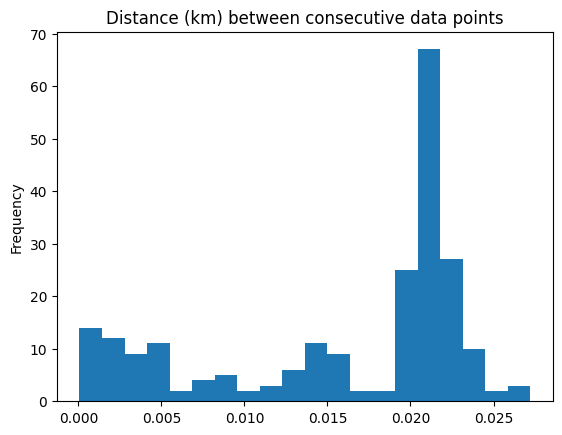

In [6]:
(
    points
    .assign(prev_lat=lambda x: x.lat.shift(1))
    .assign(prev_long=lambda x: x.long.shift(1))
    .assign(dist_covered=lambda x: haversine(x.prev_lat, x.prev_long, x.lat, x.long))
    .dist_covered.plot.hist(bins=20, title="Distance (km) between consecutive data points")
)

Most data points are around 20m apart. However, notably there are some that are very close to each other.

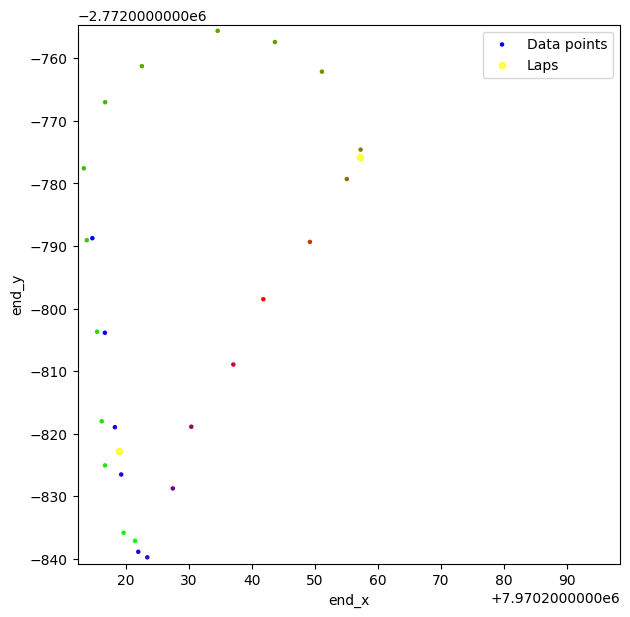

In [7]:
specific_lap = (
    points
    [lambda x: x.Timestamp.between(laps.iloc[3].Timestamp - dt.timedelta(seconds=10), laps.iloc[5].Timestamp + dt.timedelta(seconds=10))]
)

plot_map(specific_lap, laps.iloc[3:5], lc="yellow", pc="Timestamp")


The below graph shows a single rep and recovery, with 10 seconds either side of the lap. Data points are coloured in brg spectrum by timestamp - i.e the first data point in time is coloured blue, and the final data point in time is coloured green. We can see that datapoints are roughly recorded with similar distance separating them. In this example, it appears that there are datapoints close to the lap time - this is only empirical though. 

## Distance and track calcs

In [8]:
i = 6
# distance between the start and end of a lap - in this case, distance between 200m point and the finish line
haversine(laps.iloc[i].start_pos_lat, 
          laps.iloc[i].start_pos_long,
          laps.iloc[i].end_pos_lat, 
          laps.iloc[i].end_pos_long)

0.10945831527463165

In [9]:
# https://www.dlgsc.wa.gov.au/sport-and-recreation/sports-dimensions-guide/athletics-track-events
# this is what the distance should be - hypothetically
# in reality, distance run should be longer, as you never run exactly on lane 1, more the middle of lane one
# interestingly, this is not observed in this specific case
np.sqrt(0.08439**2 + 0.073**2) 

0.1115825797335767

In [15]:
# visualisation here https://www.desmos.com/calculator/sikussppqz
from cosc428_track_location.track import Track

track = Track()
print(track.project(30, 70))
print(track.project(30, -70))
print(track.project(-20, 65))

(26.770151572389626, 67.00646881567646)
(26.770151572389626, -67.00646881567646)
(-24.066497554362027, 69.63682383636129)


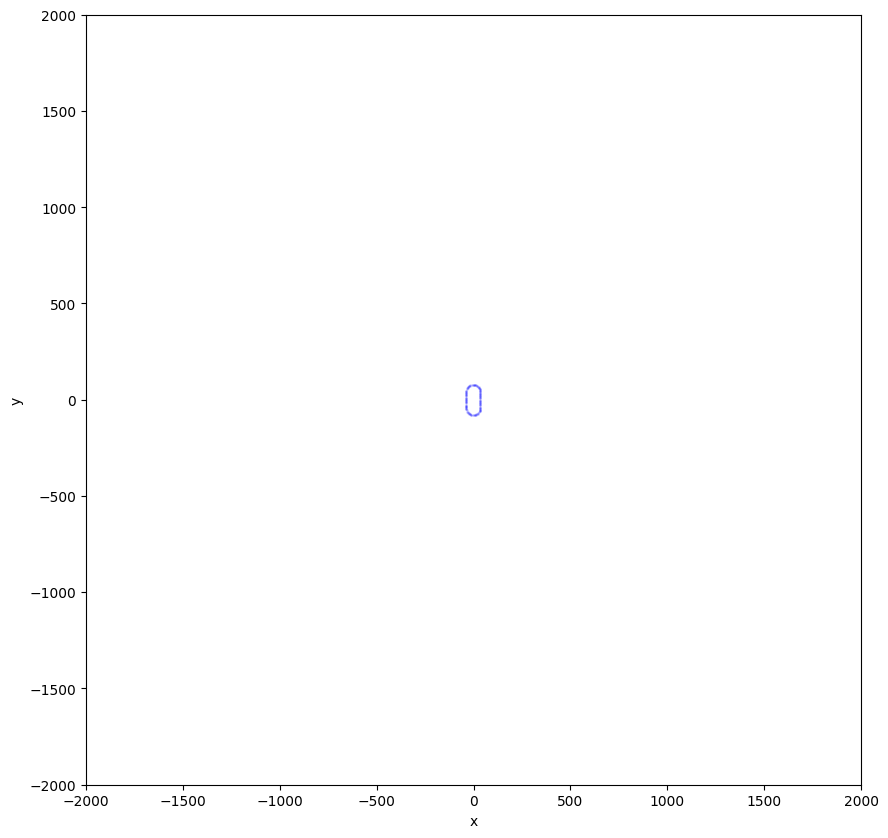

In [17]:
track_points = []
for t in range(100):
    track_points.append(track.parametric_point(t))

consistent_scale_plot(pd.DataFrame(track_points, columns=["x", "y"]))

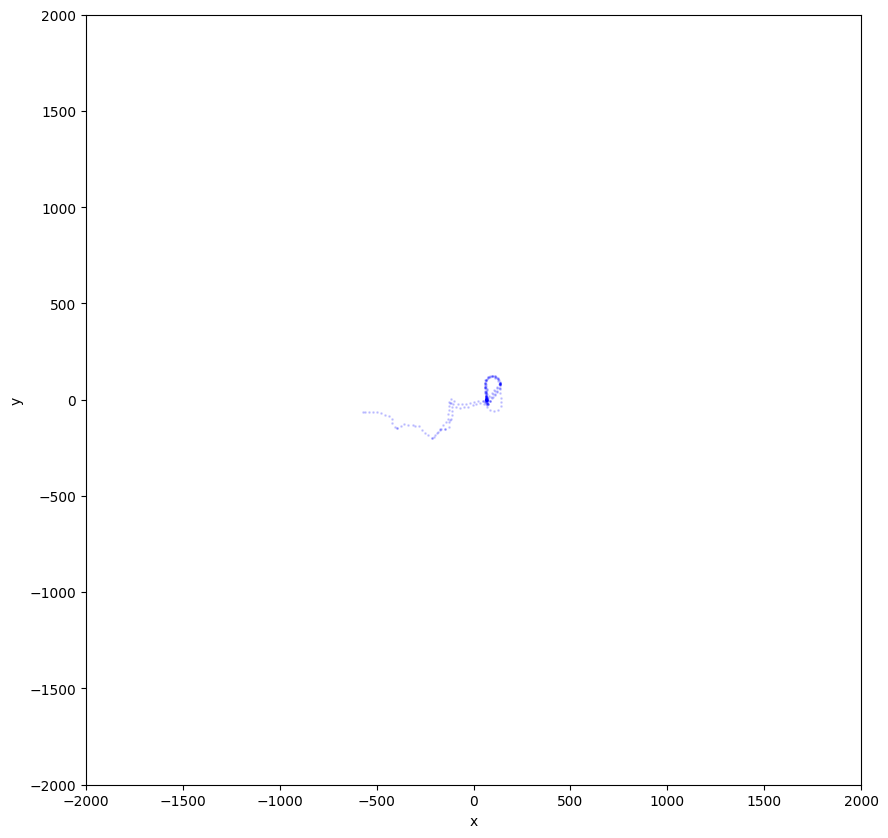

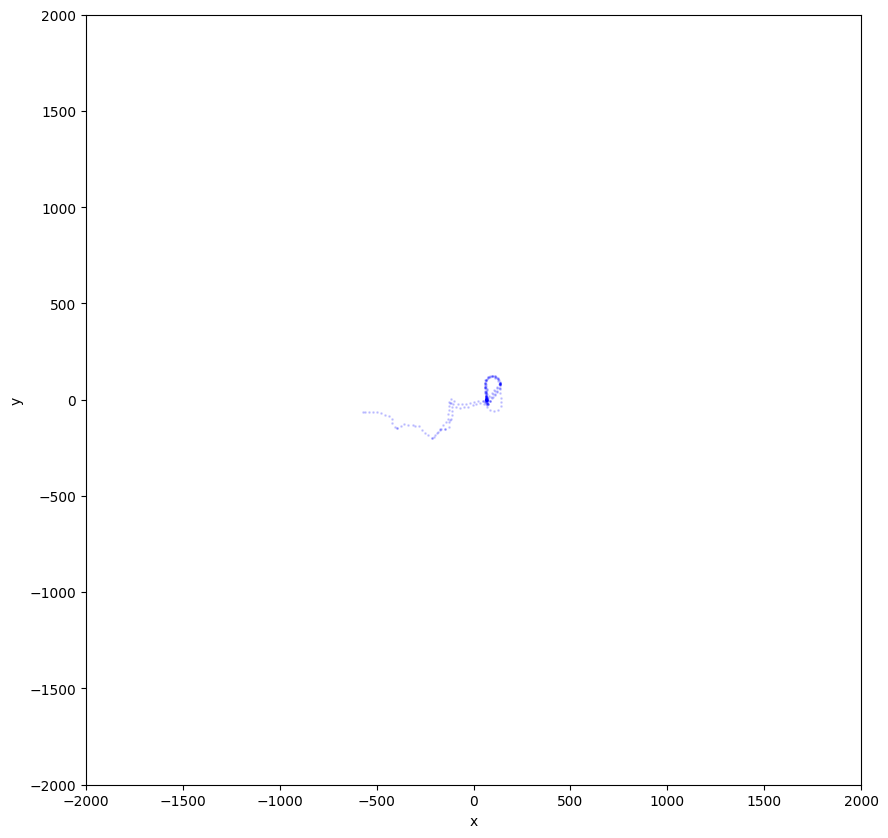

In [5]:
consistent_scale_plot(points)